## ML1 Project-2 by Ashad Amjad

**importing all required library**

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

**Loading & reading data also checking its shape**

In [2]:
### Q. Read the bank dataset 
df=pd.read_csv("bank.csv",delimiter=';')
df.shape

(4119, 21)

In [3]:
#getting breif idea of data

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [0]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
#getting idea of all the variables and it's data type to find categorical and numerical variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

**EDA PART**

In [50]:
#CHECKING TOTAL CATEGORY IN EDUCATION COLUMN

df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [49]:
### Data transformation
data['education'].unique()

NameError: name 'data' is not defined

In [3]:
## replacing  "basic.4y", "basic.9y" and "basic.6y" to 'Basic' using replace method

df1=df.replace({'education':{'basic.9y':'Basic','basic.6y':'Basic','basic.4y':'Basic'}})

In [52]:
# checking if above task executed or not

df1['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [0]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [0]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data preparation

In [ ]:
### Q. Find out in the target column what is the respective count of values

In [53]:
df1['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [ ]:
## There are 3668 NO & 451 "Yes"-----Data Looks imbalanced

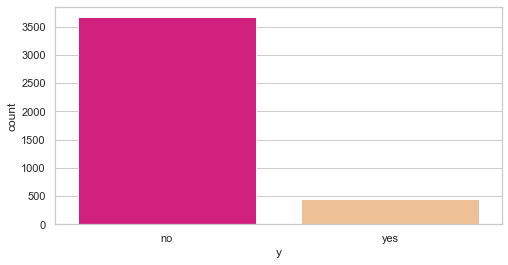

In [63]:
### Q. Also plot the values of y in form of a bar graph
plt.figure(figsize=(8,4))
sns.countplot(data=df1,x=df1['y'],palette='Accent_r')
plt.show()

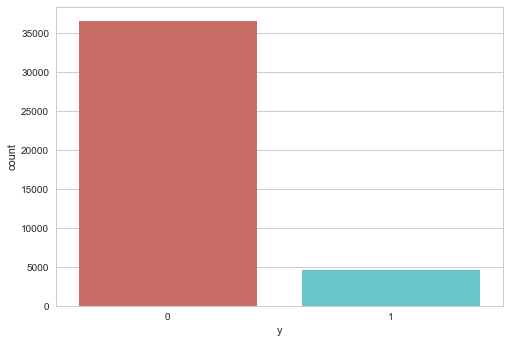

In [0]:
### Q. Find out in the target column what is the respective count of values
### Q. Also plot the values of y in form of a bar graph

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

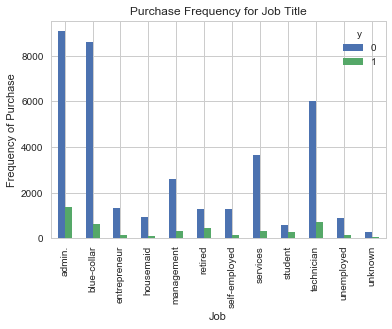

In [0]:
## Create a visualization as shown below for variable 'job' and frequency of purchase

**1-Creatin a visualization as shown above for variable 'job' and frequency of purchase**

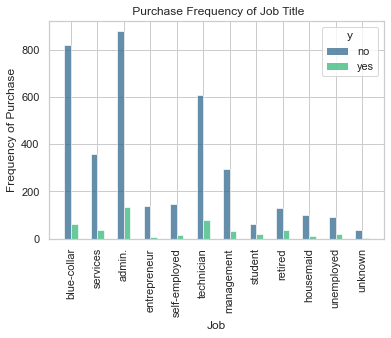

In [99]:

#plt.figure(figsize=(8,8))
ax=sns.histplot(data=df1,
                x=df1['job'],
                hue=df1['y'],
                binwidth=0.9,
                shrink=.5,
                multiple='dodge',
                palette='viridis'
               )
ax.tick_params(axis='x',rotation=90)
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.title(' Purchase Frequency of Job Title')
plt.show()

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

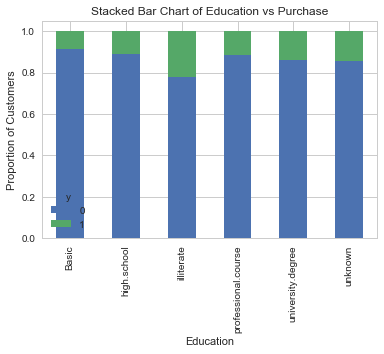

In [0]:
### Create a stacked bar chart between variables 'Education','Purchase' and Proportion of Customers



 **2-Creating a stacked bar chart between variables 'Education','Purchase' and Proportion of Customers as shown above with some modification**
 
 


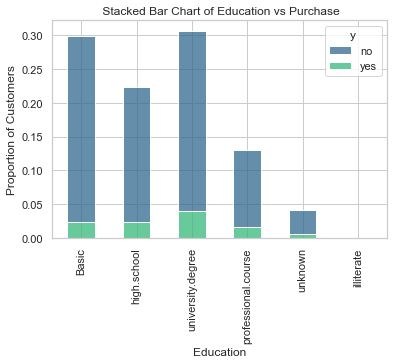

In [117]:
ax1=sns.histplot(data=df1,
                x=df1['education'],
                hue=df1['y'],
                stat='probability',
                 binwidth=2,
                shrink=.5,
                multiple='stack',
                palette='viridis'
                )
ax1.tick_params(axis='x',rotation=90)
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.title(' Stacked Bar Chart of Education vs Purchase')
plt.show()

Education seems a good predictor of the outcome variable.

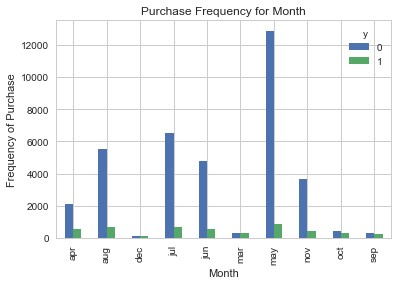

In [0]:
## Q. Write code for the visualization as shown below

***3-code for the visualization as shown above with some modification***

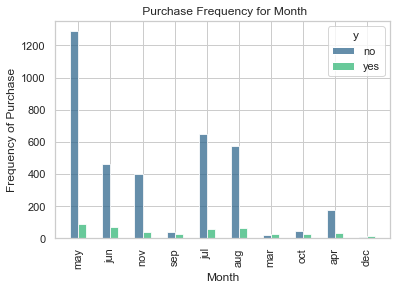

In [110]:
ax2=sns.histplot(data=df1,
                x=df1['month'],
                hue=df1['y'],
                binwidth=3,
                shrink=.5,
                multiple='dodge',
                palette='viridis'
               )
ax2.tick_params(axis='x',rotation=90)
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.title(' Purchase Frequency for Month')
plt.show()

Month might be a good predictor of the outcome variable

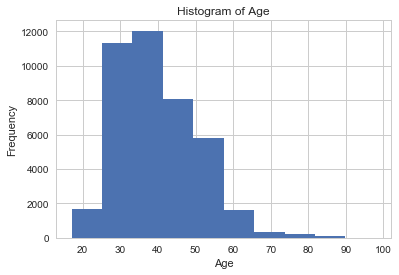

In [0]:
## Q. Write code for the visualization as shown below

**4-Writing code for the visualization as shown above**

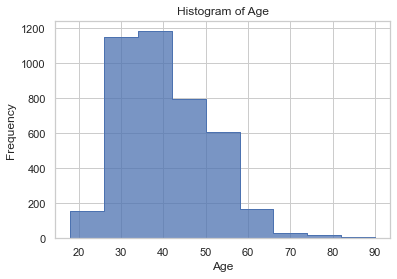

In [115]:
sns.histplot(data=df1,
             x=df1['age'],
             binwidth=8,
             fill=True,
             element="step"
                )

plt.xlabel('Age')
plt.ylabel('Frequency ')
plt.title('Histogram of Age')
plt.show()

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [4]:
## Write code to convert following columns to equivalent dummy variables

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


## Creating dummy variable for above CAT columns

In [5]:
#using pandas dummies function
df_dummies=pd.get_dummies(    data=df1,
                              prefix=cat_vars,
                              prefix_sep='_',
                              columns=cat_vars
                              )



In [68]:
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


**Encoding Target Variable using LabelEncoder**

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_dummies['y']=le.fit_transform(df_dummies['y'])

In [64]:
df_dummies['y']

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int32

### Feature Selection

In [7]:
## dividing data into target and lable


X=df_dummies.drop('y',axis=1)
y=df_dummies['y']


In [ ]:
## Find the best posible features using feature engineering techniques. 

**1-Feature Selection Using Recursive Feature selection**

In [8]:
from sklearn.feature_selection import RFE  #importing library for Recursive Feature selection

In [9]:
clf_lr=LogisticRegression()  #initializing model 

In [17]:

rfe = RFE(estimator=clf_lr, step=1,n_features_to_select=18 )  #initializing Recursive Feature selection
rfe = rfe.fit(X,y) # fitting the data

C:\Users\asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [37]:
#creating a new data frame for selected features

selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
60,poutcome_success,1
36,housing_unknown,1
41,contact_cellular,1
42,contact_telephone,1
43,month_apr,1
...,...,...
3,pdays,40
21,job_unknown,41
28,education_illiterate,42
25,marital_unknown,43


In [43]:
# selecting only top_18 features

Top_18=selected_rfe_features.nlargest(18,'Ranking')

In [82]:
# storing all the columns name in the list

cols1=Top_18['Feature']
list(cols)

['duration',
 'cons.conf.idx',
 'euribor3m',
 'cons.price.idx',
 'nr.employed',
 'emp.var.rate',
 'pdays',
 'poutcome_success',
 'previous',
 'poutcome_nonexistent',
 'housing_yes',
 'contact_telephone',
 'month_dec',
 'contact_cellular',
 'job_unemployed']

**2-Feature Selection Using ExtraTreesClassifier**

In [19]:
from sklearn.ensemble import ExtraTreesClassifier #importing library for ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()  #initializing ExtraTreesClassifier
model.fit(X,y) # fitting the model with data

ExtraTreesClassifier()

In [20]:
print(model.feature_importances_) # printing all the important features

[5.68375307e-02 1.71892255e-01 4.10455679e-02 3.01131001e-02
 1.44963189e-02 2.62779179e-02 1.94185571e-02 2.24536277e-02
 7.10858538e-02 4.46780415e-02 1.69384746e-02 1.13471351e-02
 3.55436797e-03 4.11109896e-03 8.86717079e-03 9.56827189e-03
 4.61965712e-03 9.05141165e-03 4.92978299e-03 1.42750641e-02
 6.04369088e-03 3.06295413e-03 1.05316084e-02 1.73301941e-02
 1.56368033e-02 9.07945289e-04 1.31531510e-02 1.48635628e-02
 5.91081988e-05 1.20061048e-02 1.61076869e-02 6.77681159e-03
 7.80252060e-03 8.31614447e-03 7.13542721e-06 1.73086873e-02
 1.81121548e-03 1.64252941e-02 1.12535298e-02 2.07588330e-03
 1.15876397e-02 8.33217379e-03 8.37800900e-03 5.43786505e-03
 6.00812204e-03 3.96342272e-03 6.48521718e-03 9.49292796e-03
 1.10416856e-02 1.03782605e-02 4.78254036e-03 6.49697208e-03
 4.78760170e-03 1.56093328e-02 1.73412251e-02 1.68333557e-02
 1.65751143e-02 1.45525758e-02 1.08387861e-02 1.02705793e-02
 3.37653563e-02]


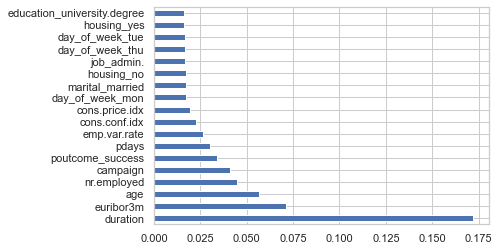

In [24]:
# Visualising the top 18 features on the basis of its score

ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(18).plot(kind='barh')
plt.show()

In [73]:
#creating a new data frame for selected features

selected_EXT_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':model.feature_importances_})

In [75]:
selected_EXT_features.head()

,Feature,Ranking
0,age,0.056838
1,duration,0.171892
2,campaign,0.041046
3,pdays,0.030113
4,previous,0.014496


In [79]:
# selecting only top_20 features

Top_20=selected_EXT_features.nlargest(20,'Ranking')

In [81]:
# storing all the columns name in the list


cols2=Top_20['Feature']
list(cols2)

['duration',
 'euribor3m',
 'age',
 'nr.employed',
 'campaign',
 'poutcome_success',
 'pdays',
 'emp.var.rate',
 'cons.conf.idx',
 'cons.price.idx',
 'day_of_week_mon',
 'marital_married',
 'housing_no',
 'job_admin.',
 'day_of_week_thu',
 'day_of_week_tue',
 'housing_yes',
 'education_university.degree',
 'marital_single',
 'day_of_week_fri']

**3-Feature Selection Using Information gain**

In [51]:
from sklearn.feature_selection import mutual_info_classif

In [52]:
mutual_info=mutual_info_classif(X,y)


In [ ]:
mutual_data=pd.Series(mutual_info,columns='score',index=X.columns)
mutual_data.sort_values(ascending=False)

In [68]:
selected_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':mutual_info})

In [69]:
selected_features.head()

,Feature,Ranking
0,age,0.004673
1,duration,0.076357
2,campaign,0.000000
3,pdays,0.033430
4,previous,0.022145


In [120]:
Top_18=selected_features.nlargest(20,'Ranking')

In [121]:
cols3=Top_18['Feature']
list(cols)

['duration',
 'cons.conf.idx',
 'euribor3m',
 'cons.price.idx',
 'nr.employed',
 'emp.var.rate',
 'pdays',
 'poutcome_success',
 'previous',
 'poutcome_nonexistent',
 'housing_yes',
 'contact_telephone',
 'month_dec',
 'contact_cellular',
 'job_unemployed']

For example --

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [0]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

In [10]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
len(cols)

18

**Extracting Data into final dependent and independent variable**

In [122]:
#using cols selected by RFE top(18)

X=df_dummies[cols3].values
y=df_dummies['y'].values

In [123]:
X.shape

(4119, 20)

**splitting data into train & test data**

In [13]:
#importing library for it
from sklearn.model_selection import train_test_split

In [14]:
#initialising the library

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=0)

### Implementing the model

### Logistic Regression Model Fitting

In [1]:
## Write code to implement Logistic Regression module by training the X,Y variables and perform prediction on the Test dataset.

In [125]:
# Initialising the LogisticRegression for our model,it is already imported above
clf_lr=LogisticRegression()
#fitting the model with Xtrain & ytrain data
lr_baseline_model = clf_lr.fit(X_train,y_train)

C:\Users\asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
# initialising prediction
y_pred=clf_lr.predict(X_test)

In [126]:
#checking the score as it wil give idea how accurate is our model

from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

accuracy score =  0.912621359223301


### Confusion Matrix

In [3]:
## Create and Analyze the confusion matrix

In [140]:

from sklearn.metrics import confusion_matrix  # importing library for the confusion matrix
cm=confusion_matrix(y_test,y_pred)  
cm

array([[720,  28],
       [ 44,  32]], dtype=int64)

### ROC/AUC

In [ ]:
## Check for ROC and Area under the curve.

In [101]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [103]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)#, auc_score2)

0.6918097382493666


**Plotting AUC & ROC**

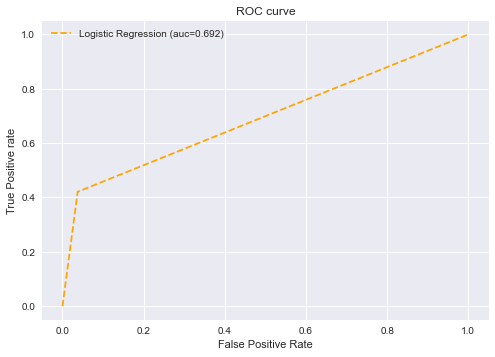

In [107]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression (auc=%0.3f)'%auc_score1)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [ ]:
## Calculate and analyze the Recall and precision

**Using classification_report library to calculate and analyze the Recall and precision**

In [104]:
from sklearn.metrics import classification_report
cm=classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       748
           1       0.53      0.42      0.47        76

    accuracy                           0.91       824
   macro avg       0.74      0.69      0.71       824
weighted avg       0.90      0.91      0.91       824



### Accuracy

In [4]:
## Find the accuracy of your model

**Using accuracy_score library to find the accuracy of my model**

In [97]:
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

accuracy score =  0.912621359223301


### Cross-validation

In [ ]:
## Allow 10-fold cross validation to run on all cores.

**1-Cross-validation using Kfold & cross_val_score**

In [136]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)

In [137]:
from sklearn.model_selection import cross_val_score
result=cross_val_score(clf_lr,X,y,cv=kfold_validation,n_jobs=-1)
print(np.mean(result))

0.9150284647910614


**2-Cross-validation using Stratified Kfold**

In [138]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
result=cross_val_score(clf_lr,X,y,cv=skfold,n_jobs=-1)
print(np.mean(result))

0.9140570004488225


### Model Tuning

In [ ]:
## Tune in different attributes of the model and get better accuracy

**1-Model Tuning using GridSearchCV**

In [15]:
# importing scikit library for hyperparatuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

In [16]:
# #--Initialising all the parameters of logistic regression

parameters = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 0.9,50,1.9, 10, 100, 1000],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

##--initialising GridSearchCV with all parameters

grid_search = GridSearchCV(estimator = clf_lr,
 param_grid = parameters,
 scoring = 'accuracy',
 cv = 10,
 n_jobs = -1)

##--fitting our train data to grid_search

grid_search.fit(X_train, y_train) 
best_accuracy_log = grid_search.best_score_
best_parameters = grid_search.best_params_

##--Printing best score
print(best_accuracy_log)

##--Printing parameters
print(best_parameters)


C:\Users\asad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

0.9162558717877867
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\asad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**best score=0.9171668048263794**
**best_parameters={'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}**